# Principal Component Analysis

PCA is used mainly as an exploratory analysis and to reduce the dimensionality of your data. High-dimensional data often makes visualization harder and you may face the curse that some variables may be highly correlated with each other and thus resulting in multicollinearity of predictor variables. The general idea is to reduce dimensionality while preserving important characteristics and variation of the original dataset. **PCA is used only to numerical variables**


* Dimensionality reduction for a given dataset means less computation or training time for ML models

* Redundancy is removed after removing similar entries from the dataset. With preprocessing you can find highly correlated predictor variables that can be removed from analysis.

* Space required to store the data is reduced

* Makes data easy for plotting in 2d and 3d plots

* It helps to find out the most significant features and skip the rest

* Leads to better human interpretations - One can draw pattern inferences about PCA analysis



In PCA the mathematical behind the algorithm tries to find the best "projection" of the data points along axes which usually will be the Principal Components 1 and 2


#### Some important terminologies

* Views: The perspectives through which datapoints are observed. 

* Dimension: Number of columns in a dataset are called the dimensions of that dataset 

* Principal Component: New variables that are constructed as linear combinations or mixtures of the initial variables

* Projections: The perpencidular distance between the principal component and the datapoints


#### Important properties

* Number of principal components is **always less than or equal** to the number of attributes (predictors)

* Principal components are **orthogonal**

* The priority of principal components **decreases** as their numbers increase. Generally the first PCs are the most important ones. 


#### How PCA works?

The following operations are performed to evaluate the principal components for a given dataset:

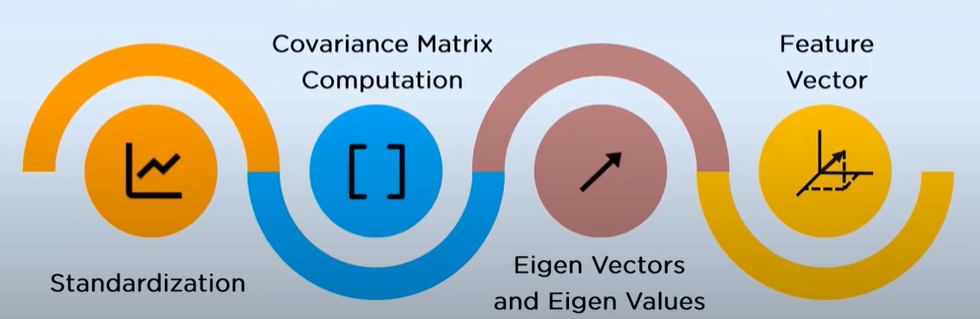



* Standardization of the data 

    - Standardize the range of variables so that each one of them lies within similar boundaries. The process involves z-scaling by subtracting the mean from each value and dividing by the standard deviation of that variable. This will result in a stardadized variable with mean 0 and sd 1. 




* Covariance Matrix computation

    - Used to express the **correlation** between any two or more predictor variables in a multidimensional dataset. The covariance matrix has the entries as the variance and covariance of the variables values. Variance is denote as Var and covariance as Cov.
    
    - Covariance matrix tells us how the two or more variables are related. **Positive** covariance indicate that the value of one variable is **directly proportional** to other variable. While **negative** covariance indicate that the value of one variable is **inversely proportion** to other variable.
    
    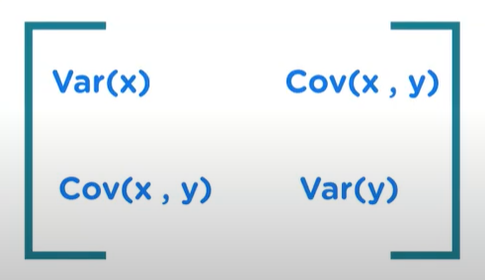
    



* Covariance matrix is used to generate eigenvectors and eigenvalues. 

    - Mathematical values that are extracted from the covariance table. They are responsible for the generation of new set of variables which further **leads to the construction of principal components**.
    
    - **Eigenvectors** do not change directions after linear transformation
    
    - **Eigenvalues** are the **scalars or the magnitude** of the Eigenvectors




* Find the feature vector.

    - Feature vector is simply a matrix that has eigenvectors of the components that we decide to keep as the columns. We decide whether we must keep or disregard the less significant principal components that we have generated in the above steps. 




#### A PCA example


COnsider a matrix X with N rows or observations and K columns or variables. For this matrix we would construct a **variable space** with as many dimensions as the variables.

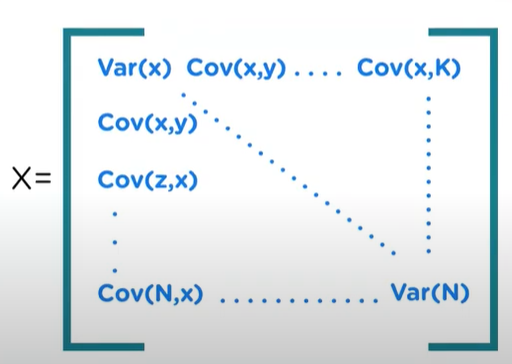



For simplicity, lets consider just three dimensions on the variable space:

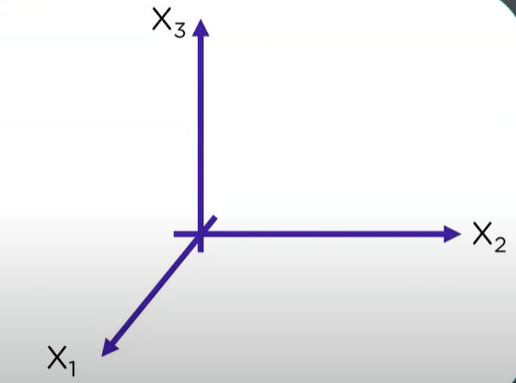



Now each observation (row of the matrix) is placed in the K-dimensional variable space such that the rows in the data table form a swarm of points in this space:

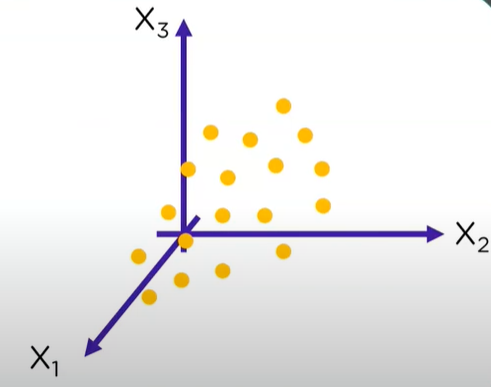


Now, we find the mean of all data points and then place it along the datapoins on the plot. The first principal component is a **line that best accounts for the shape of the point swarm**. It reprents the maximum variance direction in the data. **Each observation may be projected onto this line to get a coordinate value along the PC1**. This value is known as a score. 


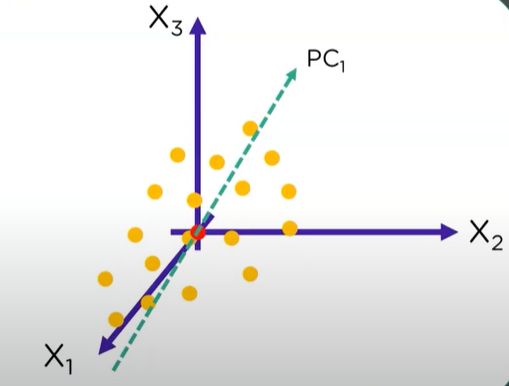


Usually, only one principal component is insufficient to model the systematic variation for a dataset. Thus, a second principal axis is created. The second PC is oriented such that it reflects the **second largest source of variation** in the data, while being **orthogonal** to PC1. **PC2 also passes through the average point**.


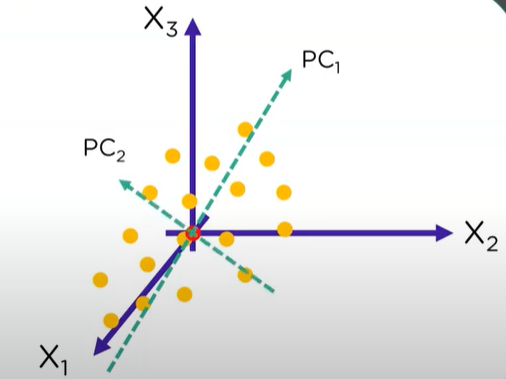

# Implementing PCA analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
#cancer dataset has many features
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
#load data into a df object
df = pd.DataFrame(cancer["data"], columns = cancer["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space with a single scatter plot. Before we do this though, we we'll need to scale our data so each feature has a single unit variance

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #assign object classifier
scaler.fit(df)
df_scaled = scaler.transform(df) #remember that transforming the data converts the data frame into an array of arrays

In [9]:
df_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

PCA with Scikit-learn is very similar to other ML functions, we have to instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimension reduction by calling transform(). 

We can also specify how many components we want to keep when creating the PCA object.

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 2) #create object classifier specifying model parameters
pca.fit(df_scaled) #fit pca

PCA(n_components=2)

In [12]:
pca.components_ #inspect principal components

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [13]:
x_pca = pca.transform(df_scaled) #appy transformation and dimensionality reduction

In [15]:
print(df_scaled.shape, x_pca.shape) #inspect the shape and note now how the number of features reduced from 30 to 2 PC

(569, 30) (569, 2)


In [18]:
x_pca[:, 0] #first PC

(569,)

In [ ]:
x_pca[:, 1] #second PC

Text(0, 0.5, 'PC2')

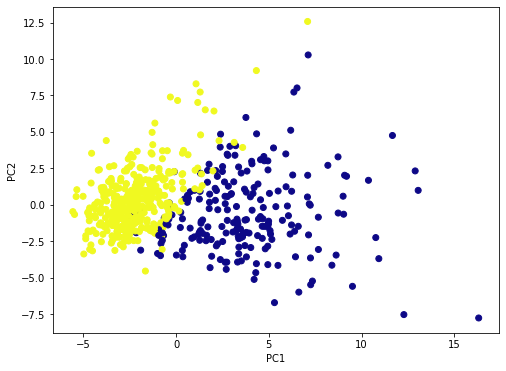

In [22]:
#plot these dimensions
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer["target"], cmap = "plasma") # c argument stands for color; cmap for color pallet
plt.xlabel("PC1")
plt.ylabel("PC2")

Clearly by using these two components we can separate these two classes

However, unfortunately with this great power of dimensionality reduction, comes the cost of NOT being able to easily understand what these components represent

The components correspond to **combinations of the original features**, the components themselves are stored as an atribbute of the fitted PCA object. 

In [34]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row is a principal component, and each column relates back to the original features. We can visualize this relationship with a heatmap:

In [35]:
df_comp = pd.DataFrame(pca.components_, columns = cancer["feature_names"])
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

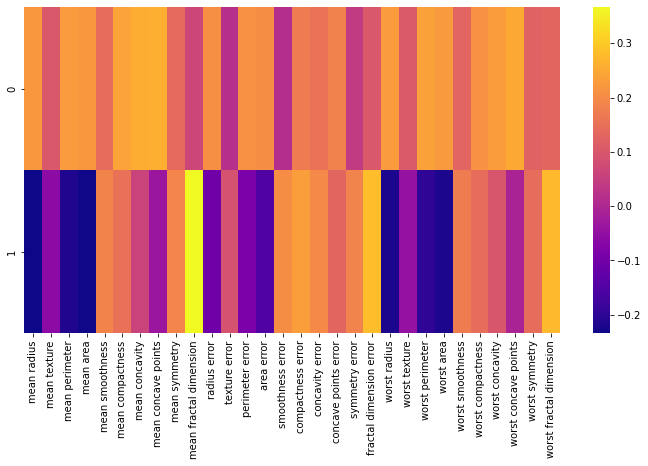

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap="plasma")

The heatmap and the color bar basically represent the correlation between the various feature and the principal component itself. 